<a href="https://colab.research.google.com/github/chjameskumar/Week-2/blob/main/G2M_insight_for_Cab_Investment_firm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# G2M insight for Cab Investment firm

---

**Project Description:**

The main task of this project is to analyze multiple datasets related to two cab companies to provide actionable insights for investment decision in the cab industry. By evaluating customer profiles and market trends, the goal is to identify the most suitable company for investment and present the findings in a visually compelling and insightful manner to Executive team.

**Data Set:**

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

---

# Importing libraries & data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import ttest_ind, chi2_contingency

In [3]:
!gdown 1b_FZ_6ALQsD9ZaOFuLN4n0IXXwwemlF6

Downloading...
From: https://drive.google.com/uc?id=1b_FZ_6ALQsD9ZaOFuLN4n0IXXwwemlF6
To: /content/Cab_Data.csv
100% 21.2M/21.2M [00:00<00:00, 67.6MB/s]


In [4]:
!gdown 1clgqENGZgOCakoErCuPA8gQMpGplTuNH

Downloading...
From: https://drive.google.com/uc?id=1clgqENGZgOCakoErCuPA8gQMpGplTuNH
To: /content/City.csv
100% 759/759 [00:00<00:00, 2.45MB/s]


In [5]:
!gdown 15HYCv83IYNtq_Nyql-GbrF7KkzIXwwZM

Downloading...
From: https://drive.google.com/uc?id=15HYCv83IYNtq_Nyql-GbrF7KkzIXwwZM
To: /content/Customer_ID.csv
100% 1.05M/1.05M [00:00<00:00, 24.4MB/s]


In [6]:
!gdown 1b_I-22au9PREgXaQho2d0TLRYoB6uzWV

Downloading...
From: https://drive.google.com/uc?id=1b_I-22au9PREgXaQho2d0TLRYoB6uzWV
To: /content/Transaction_ID.csv
100% 9.00M/9.00M [00:00<00:00, 83.6MB/s]


In [7]:
cab_data = pd.read_csv("/content/Cab_Data.csv")
city = pd.read_csv("/content/City.csv")
customer_id = pd.read_csv("/content/Customer_ID.csv")
transaction_id = pd.read_csv("/content/Transaction_ID.csv")

# Data Preprocessing

In [8]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


---
* Here travel date is not in proper format so we have to convert it into proper format also it is in object dtype
---

In [10]:
def date_travel(d):
    start = datetime.datetime(1900, 1, 1)
    return start + datetime.timedelta(d)

In [11]:
cab_data["Date of Travel"] = cab_data["Date of Travel"].apply(date_travel)

In [12]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [14]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017-08-19 01:37:55.042293760,22.567254,423.443311,286.190113
min,1.000001e+07,2016-01-04 00:00:00,1.900000,15.600000,19.000000
25%,1.011081e+07,2016-11-25 00:00:00,12.000000,206.437500,151.200000
50%,1.022104e+07,2017-09-12 00:00:00,22.440000,386.360000,282.480000
75%,1.033094e+07,2018-05-14 00:00:00,32.960000,583.660000,413.683200
max,1.044011e+07,2019-01-02 00:00:00,48.000000,2048.030000,691.200000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661


In [15]:
cab_data.isnull().sum()

,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0


In [16]:
cab_data.duplicated().sum()

0

In [17]:
cab_data["Company"].value_counts()

,count
Company,
Yellow Cab,274681
Pink Cab,84711


In [18]:
cab_data["City"].value_counts()

,count
City,
NEW YORK NY,99885
CHICAGO IL,56625
LOS ANGELES CA,48033
WASHINGTON DC,43737
BOSTON MA,29692
SAN DIEGO CA,20488
SILICON VALLEY,8519
SEATTLE WA,7997
ATLANTA GA,7557


In [19]:
cab_data["Company"].value_counts()

,count
Company,
Yellow Cab,274681
Pink Cab,84711


In [20]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [21]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


---
* Here Population and Users are showing object data type but they are integer data type.
---

In [22]:
city["Population"] = city["Population"].str.replace(",","").astype(int)
city["Users"] = city["Users"].str.replace(",","").astype(int)

In [23]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


In [24]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [25]:
city.isnull().sum()

,0
City,0
Population,0
Users,0


In [26]:
city.duplicated().sum()

0

In [27]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [28]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [29]:
customer_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [30]:
customer_id.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Income (USD/Month),0


In [31]:
customer_id.duplicated().sum()

0

In [32]:
customer_id["Gender"].value_counts()

,count
Gender,
Male,26562
Female,22609


In [33]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [34]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [35]:
transaction_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [36]:
transaction_id.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Payment_Mode,0


In [37]:
transaction_id.duplicated().sum()

0

In [38]:
transaction_id["Payment_Mode"].value_counts()

,count
Payment_Mode,
Card,263991
Cash,176107


---
* Merging all Data
---

In [39]:
df = cab_data.merge(city, on="City").merge(transaction_id, on="Transaction ID")

In [40]:
df = df.merge(customer_id, on="Customer ID")
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,28712,Cash,Male,53,11242
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,28020,Cash,Male,23,23327
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,52392,Cash,Male,24,15651
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,53286,Cash,Male,32,6528
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,52265,Cash,Male,56,7966
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,52175,Card,Male,32,6423


In [41]:
# Creating a new column
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [43]:
df.isnull().sum()

,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0
Population,0
Users,0
Customer ID,0


In [44]:
df.duplicated().sum()

0

# EDA

---

Gender Distribution of the Companies

---

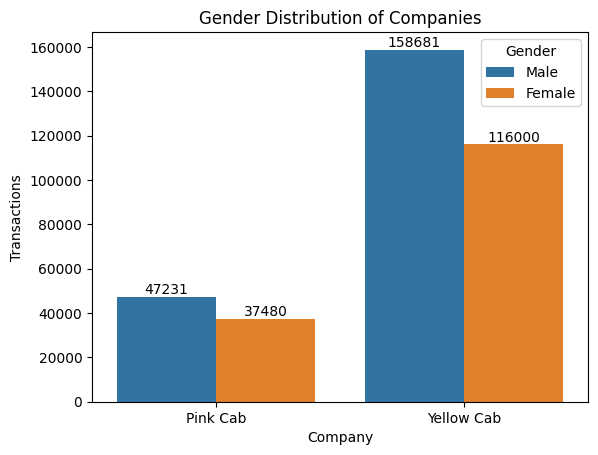

In [45]:
ax = sns.countplot(x=df["Company"], hue=df["Gender"])
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel("Company")
plt.ylabel("Transactions")
plt.title("Gender Distribution of Companies")
plt.show()

---

Payment mode distribution of Company

---

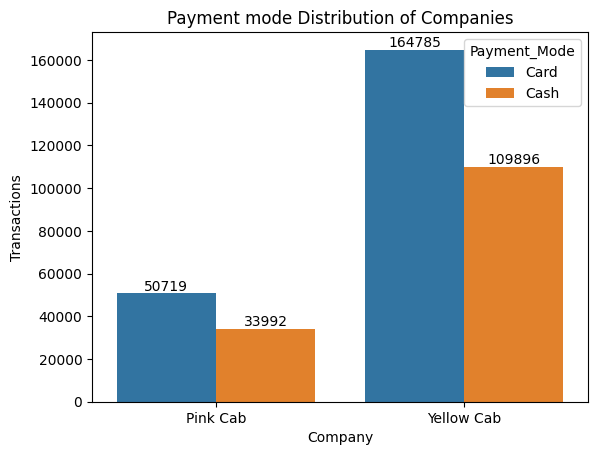

In [46]:
ax = sns.countplot(x=df["Company"], hue=df["Payment_Mode"])
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel("Company")
plt.ylabel("Transactions")
plt.title("Payment mode Distribution of Companies")
plt.show()

In [47]:
# Creating a copy of dataset to do create columns/some calcutaions to find insights
df2 = df.copy()

---

The average profit per trip for each company.

---

<ipython-input-48-8cc9daa4fe63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=com_profit, x="Company", y="Profit", palette="flare")


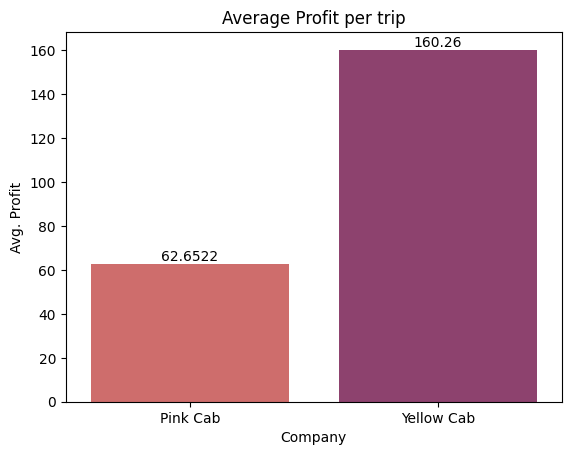

In [48]:
com_profit = df2.groupby(by="Company")["Profit"].mean().reset_index()

ax = sns.barplot(data=com_profit, x="Company", y="Profit", palette="flare")
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel("Company")
plt.ylabel("Avg. Profit")
plt.title("Average Profit per trip")

plt.show()

---

Total monthly rides for each company.

---

<ipython-input-49-3a535e286900>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:royalblue'` for the same effect.

  ax = sns.barplot(data=transaction_count, x="month", y="Transaction ID", hue="Company", width=0.7, color="royalblue")


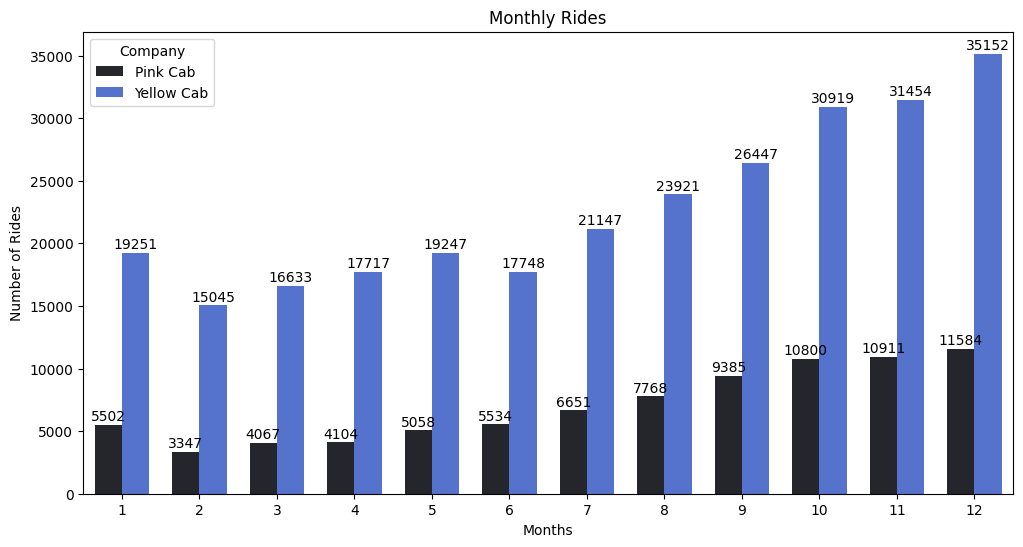

In [49]:
df2["month"] = df2["Date of Travel"].dt.month
transaction_count = df2.groupby(["month","Company"])["Transaction ID"].count().reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(data=transaction_count, x="month", y="Transaction ID", hue="Company", width=0.7, color="royalblue")

for label in ax.containers:
    ax.bar_label(label, padding=1)
plt.title("Monthly Rides")
plt.xlabel("Months")
plt.ylabel("Number of Rides")
plt.show()

---

Average Price charged per KM of each Company

---

<ipython-input-50-850c3df2bb43>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=per_km, x="Company", y="Price per KM", palette="flare")


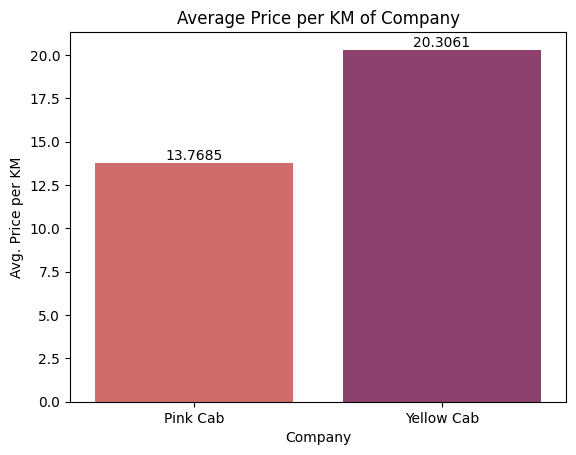

In [50]:
df2["Price per KM"] = df2["Price Charged"]/df2["KM Travelled"]
per_km = df2.groupby(by="Company")["Price per KM"].mean().reset_index()

ax = sns.barplot(data=per_km, x="Company", y="Price per KM", palette="flare")

for label in ax.containers:
    ax.bar_label(label)
plt.xlabel("Company")
plt.ylabel("Avg. Price per KM")
plt.title("Average Price per KM of Company")

plt.show()

---

Rides from all cities for each company.

---

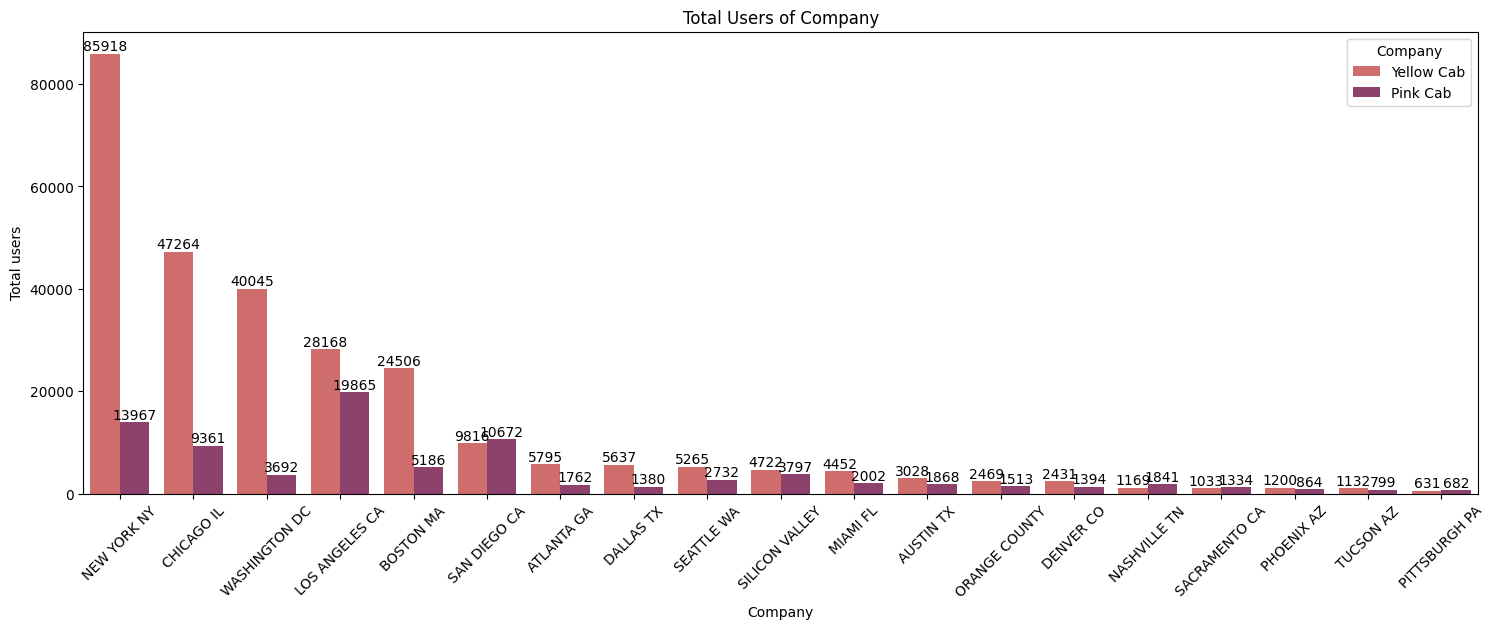

In [51]:
plt.figure(figsize=(18,6))
users = df2.groupby(by=["City","Company"])["Transaction ID"].count().sort_values(ascending=False).reset_index()

ax = sns.barplot(data=users, x="City",hue="Company", y="Transaction ID", palette="flare")

for label in ax.containers:
    ax.bar_label(label)
plt.xlabel("Company")
plt.xticks(rotation=45)
plt.ylabel("Total users")
plt.title("Total Users of Company")

plt.show()

---

Profit distribution of each company.

---

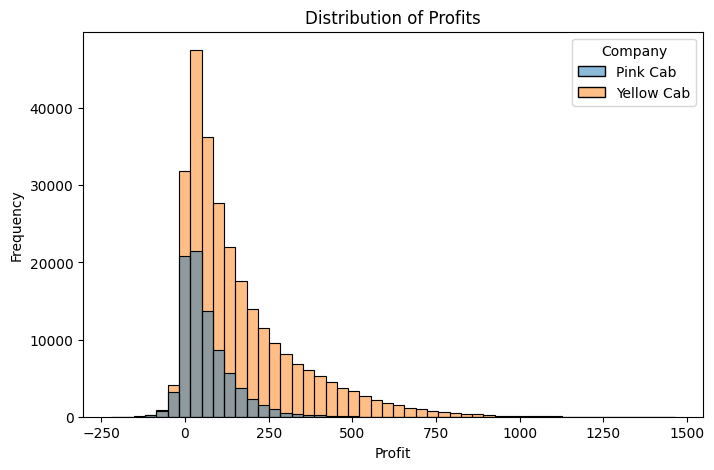

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x="Profit",hue="Company", bins=50)
plt.title("Distribution of Profits")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()



---

The average profit per month for each company.

---

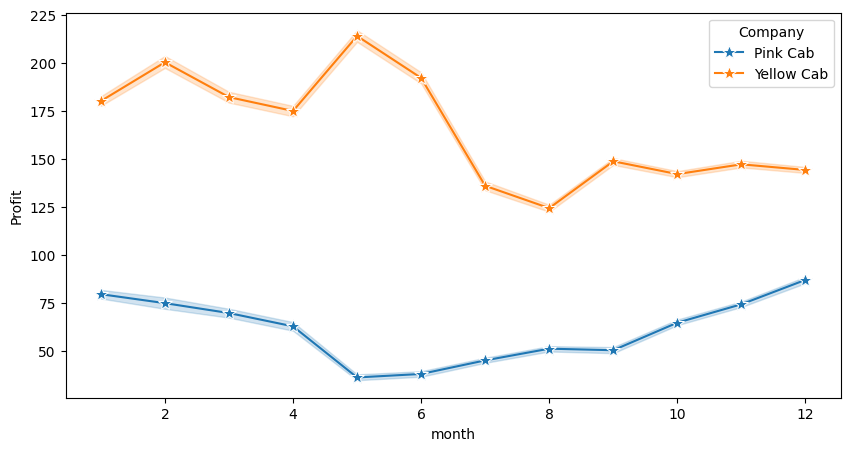

In [63]:
plt.figure(figsize=(10,5))

sns.lineplot(data=df2, x="month", y="Profit", hue="Company", marker="*", markersize=10)

plt.show()

# Hypothesis Tests

## Gender Hypothesis test

---

Does gender affect the choice of a cab company?

Null Hypothesis (H0): Gender does not affect the choice of a cab company.

Alternative Hypothesis (Ha): Gender affects the choice of a cab company.

Significance Level: 5%.

---

In [54]:
alpha = 0.05
data = pd.crosstab(df["Gender"], df["Company"])

chi2, p_value, dof, expected = chi2_contingency(data)

print("data :", data)
print("chi2 :", chi2)
print("p_value :", p_value)
print("dof :", dof)
print("expected values :", expected)
print("")

if p_value < alpha:
    print("Interpreteation : Reject the Null Hypothesis")
else:
    print("Interpreteation : Fail to Reject the Null Hypothesis")

data : Company  Pink Cab  Yellow Cab
Gender                       
Female      37480      116000
Male        47231      158681
chi2 : 107.22063897254299
p_value : 3.982674650131372e-25
dof : 1
expected values : [[ 36176.22061704 117303.77938296]
 [ 48534.77938296 157377.22061704]]

Interpreteation : Reject the Null Hypothesis


---

As a result, we reject the null hypothesis. This means gender plays a significant role in choosing a cab company.

---

## Income Hypothesis test

---

Does income play a role in choosing a cab company?

Null Hypothesis (H0): Income does not affect the choice of a cab company.

Alternate Hypothesis (Ha): Income affects the choice of a cab company.

Significance Level: 5%.

---

In [55]:
alpha = 0.05
Pink_cab = df[df["Company"] == "Pink Cab"]["Income (USD/Month)"]
Yellow_cab = df[df["Company"] == "Yellow Cab"]["Income (USD/Month)"]

t_stat, p_value = ttest_ind(Pink_cab, Yellow_cab, equal_var=False)

print("t_stat :", t_stat)
print("p_value :", p_value)
print("")

if p_value < alpha:
    print("Interpreteation : Reject the Null Hypothesis")
else:
    print("Interpreteation : Fail to Reject the Null Hypothesis")

t_stat : 0.42631105474487024
p_value : 0.6698818568949252

Interpreteation : Fail to Reject the Null Hypothesis


---

As a result, the income of a customer does not affect their choice of cab company.

---

## Company profit Hypothesis test

---

Is there a significant difference in the overall profit of companies?

Null Hypothesis (H0): There is no difference in the companies' average profits.

Alternate Hypothesis (Ha): There is a difference in the companies' average profits.

Significance Level: 5%

---

In [56]:
alpha = 0.05
Pink_cab = df[df["Company"] == "Pink Cab"]["Profit"]
Yellow_cab = df[df["Company"] == "Yellow Cab"]["Profit"]

t_stat, p_value = ttest_ind(Pink_cab, Yellow_cab, equal_var=False)

print("t_stat :", t_stat)
print("p_value :", p_value)
print("")

if p_value < alpha:
    print("Interpreteation : Reject the Null Hypothesis")
else:
    print("Interpreteation : Fail to Reject the Null Hypothesis")

t_stat : -230.99551452746311
p_value : 0.0

Interpreteation : Reject the Null Hypothesis


---

The result shows there is a significant difference in the profits per trip of both companies. One of them is making more profit.

---

## Payment mode Hypothesis test

---

Does the payment mode have any effect on the average profit of a company?

Null Hypothesis (H0): Payment mode has no effect on the profit of a company.

Alternate Hypothesis (Ha): Payment mode affects the profit of a company.

Significance Level: 5%.

---

In [57]:
alpha = 0.05
data = pd.crosstab(df["Payment_Mode"], df["Company"])

chi2, p_value, dof, expected = chi2_contingency(data)

print("data :", data)
print("chi2 :", chi2)
print("p_value :", p_value)
print("dof :", dof)
print("expected values :", expected)
print("")

if p_value < alpha:
    print("Interpreteation : Reject the Null Hypothesis")
else:
    print("Interpreteation : Fail to Reject the Null Hypothesis")

data : Company       Pink Cab  Yellow Cab
Payment_Mode                      
Card             50719      164785
Cash             33992      109896
chi2 : 0.3733235887859897
p_value : 0.5411981778304723
dof : 1
expected values : [[ 50795.67531832 164708.32468168]
 [ 33915.32468168 109972.67531832]]

Interpreteation : Fail to Reject the Null Hypothesis


---

As a result, we failed to reject the null hypothesis, so the payment mode has no effect on the profit of the company.

---

## Cost per trip Hypothesis test

---

Is the cost per trip of both companies significantly different?

Null Hypothesis (H0): There is no difference in the cost per trip of both companies.

Alternate Hypothesis (Ha): There is a difference in the cost per trip of both companies.

Significance Level: 5%.

---

In [58]:
alpha = 0.05
pink_cab = df[df["Company"] == "Pink Cab"]["Cost of Trip"]
yellow_cab = df[df["Company"] == "Yellow Cab"]["Cost of Trip"]

t_stat, p_value = ttest_ind(pink_cab,yellow_cab)

print("t_stat :", t_stat)
print("p_value :", p_value)
print("")

if p_value < alpha:
    print("Interpreteation : Reject the Null Hypothesis")
else:
    print("Interpreteation : Fail to Reject the Null Hypothesis")

t_stat : -80.8861018010166
p_value : 0.0

Interpreteation : Reject the Null Hypothesis


---

As a result, there is a significant difference in the cost per trip of both companies.

---